In [1]:
%%bash
pip install --upgrade -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.1/384.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.3 MB/s eta 0:00:00


  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.0
    Uninstalling widgetsnbextension-3.6.0:
      Successfully uninstalled widgetsnbextension-3.6.0
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 1.1.0
    Uninstalling jupyterlab-widgets-1.1.0:
      Successfully uninstalled jupyterlab-widgets-1.1.0
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
%%bash
jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import copy
import re
import statsmodels.formula.api as smf
from scipy import stats
from eli5 import explain_weights


import statistical_analysis as sa
import ml
import plotting as pt

%load_ext autoreload
%autoreload 2
%matplotlib inline  

1. KS explanation [D]
    Pick best test given sample size
    KS is not necessarily best, we need top decide what to use from first principles
    Decision: Do t-test for now
    
2. Sample Size: [D]
    set to 5 by default [D]
    
3. Filter out ones that don't make sense (JAD)
    Ignore: 
    - Dimension: length, volume, weight, etc
    - 
    
4. Understand grouping better [D]
    5. Implement one vs all as well [D]
    6. generalize code to make switching between pair wise and one vs rest the same [D]

5. ML
   - XGboost [D]
       pros: 
           - Deals with missing data relatively well
           - Has easily interpretable weights
           - Will work for regression and categorical data
       cons:
        -? 
        
   - Maybe try:https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db
       - CatBoost
       - LightGBM

           
    

TODO Rodrigo:

- Add t-test [Done]
- exclude by sample size [Done]
- Start with decision trees [Done]
    - start with Max output force (N) and Max stroke (m) and Response time (s) - Regression [Done]
- Find Jad a good ML book 
- Try CatBoost (or anything that improves categorical performance)
- Let us predict categorical variables

-- wait for Jad--
- Data transformation (make pre-processing modules):
    - For actuation, discard all that are not thermal or photo
    - For type of deformation discard any that is not bending, uniaxial contraction/expansion, jumping
    - Consider jumping and uniaxis as same category


TODO Jad:

1. Meet weith pance and check this all makes sense
    - Confirm t-test [Done]
    - Discuss other kind of statstical testing [?]
    - Discuss controlling for variables (like controlling for thickness in response time vs phase transition) [?]
2. https://www.freecodecamp.org/news/machine-learning-with-scikit-learn-full-course/
3. Fill out more data, if possible [Done]
    - Fill out missing values
    - Try to add data from crystallographic dataset
4. Consider
    - Binning vs continous (how much noise is signal)
        - If binning, which thresholds
    - z-scores (including variance in predictor variable)
    
    

# Load data

In [6]:
# df = pd.read_excel('DynamicCrystals.xlsx', engine='openpyxl', skiprows=[0])
# df

In [4]:
df = pd.read_csv('DynamicCrystals_ML.csv')
df

,CHEMICAL NAME,CHEMICAL FAMILY,Metallic,Reaction Group,Martensitic,Phase transition,Length (m),Width (m),Thickness (m),Volume (m3),...,Max force density (N m^-3),Max work output (J),Max work density (J m^-3),Max power output (kW),Max power density (kW m-3),Actuator efficiency,Source of Actuation,Type of deformation,Reversibility of actuation,Crystal intact
0,"1,2-bis(5-methyl-2- phenyl-4-thiazolyl)perfluo...",DE,No,Ring opening,No,No,0.000182,0.000005,0.000004,3.910000e-15,...,NaN,NaN,NaN,NaN,NaN,NaN,Photo,Bending,Yes,Yes
1,"4,4’-azopyridine and probenecid cocrystal",Co-crystal,No,Molecular Gliding/Conformational,Yes,No,0.009000,0.002000,0.000500,9.000000e-09,...,NaN,NaN,NaN,NaN,NaN,NaN,Photo,Bending,Yes,Yes
2,"4,4’-azopyridine and probenecid cocrystal",Co-crystal,No,Molecular Gliding/Conformational,Yes,Yes,0.006120,0.000260,0.000120,1.910000e-10,...,NaN,NaN,NaN,NaN,NaN,NaN,Thermo,Twisting,Yes,Yes
3,Diarylethene 1,DE,No,Ring opening,No,No,0.000260,NaN,0.000007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Photo,Bending,Yes,Yes
4,Diarylethene 2,DE,No,Ring opening,No,No,0.000322,NaN,0.000007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Photo,Bending,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,"Naphthalene-2,3-diyl-bis(4-fluorobenzoate)",Pincer-Type Diester,No,Conformational Change,Yes,Yes,0.000237,0.000114,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Thermo,Jumping,Yes,Yes
119,Cobalt(II) complex,organometallic,Yes,Conformational Change,Yes,Yes,0.001900,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Thermo,Uniaxial expansion/contraction,Yes,Yes
120,Ni complex,organometallic,Yes,Molecular Rotation,Yes,Yes,0.000470,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Thermo,Uniaxial expansion/contraction,Yes,Yes
121,Butoxyphenyl N-substituted naphthalene diimide,Naphthalene diimide,No,Molecular Gliding,No,Yes,0.003500,0.000080,0.000050,1.400000e-11,...,2860000.0,2.000000e-08,1430.0,2.000000e-09,143.0,NaN,Thermo,Bending,Yes,Yes


# Categorical Vs Continous

In [5]:
df.columns

Index(['CHEMICAL NAME', 'CHEMICAL FAMILY', 'Metallic', 'Reaction Group',
       'Martensitic', 'Phase transition', 'Length (m)', 'Width (m)',
       'Thickness (m)', 'Volume (m3)', 'Weight (kg)', 'E (Gpa)', 'Z Value (R)',
       'Calc. Density (R)', 'a', 'b', 'c', 'Alpha', 'Beta', 'Gamma',
       'Cell Volume (R)', 'Unique Chemical Units (I)', 'Melting Point /C',
       'Molecular volume', 'Habit', 'Crystal Family', 'Molecular Weight',
       'Max stroke (m)', 'Deformation Capacity', 'Response time (s)',
       'Recovery time (s)', 'Max velocity (m/s)', 'Max output force (N)',
       'Max force density (N m^-3)', ' Max work output (J)',
       ' Max work density  (J m^-3)', ' Max power output (kW)',
       'Max power density (kW m-3)', 'Actuator efficiency ',
       'Source of Actuation', 'Type of deformation',
       'Reversibility of actuation', 'Crystal intact'],
      dtype='object')

In [6]:
col_types = sa.get_col_types(df)
col_types

,type,num_categories,scale,min,max,range
name,,,,,,
CHEMICAL NAME,categorical,90.0,NaN,NaN,NaN,NaN
CHEMICAL FAMILY,categorical,25.0,NaN,NaN,NaN,NaN
Metallic,categorical,3.0,NaN,NaN,NaN,NaN
Reaction Group,categorical,9.0,NaN,NaN,NaN,NaN
Martensitic,categorical,3.0,NaN,NaN,NaN,NaN
Phase transition,categorical,2.0,NaN,NaN,NaN,NaN
Length (m),continous,NaN,log,6.000000e-06,6.000000e-02,1.000000e+04
Width (m),continous,NaN,log,1.770000e-07,3.750000e-03,2.118644e+04
Thickness (m),continous,NaN,log,1.770000e-07,2.000000e-03,1.129944e+04


In [16]:
issues = ['CHEMICAL NAME']
dimensions = ['Length  (m)','Width  (m)', 'Thickness  (m)', 'Weight  (kg)']
calculated = ['Volume (m3)', 'Max velocity  (m/s)', 'Max force density (N m^-3)'] # add all densities

col_types_to_drop = issues + dimensions + calculated
selected_col_types = col_types.drop(col_types_to_drop)
selected_col_types

,type,num_categories,scale,min,max,range
name,,,,,,
CHEMICAL FAMILY,categorical,25.0,NaN,NaN,NaN,NaN
Reaction Group1,categorical,15.0,NaN,NaN,NaN,NaN
Reaction Group2,categorical,12.0,NaN,NaN,NaN,NaN
Martensitic,categorical,3.0,NaN,NaN,NaN,NaN
Phase transition,categorical,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
F_binary,categorical,3.0,NaN,NaN,NaN,NaN
Ni_binary,categorical,3.0,NaN,NaN,NaN,NaN
Pd_binary,categorical,3.0,NaN,NaN,NaN,NaN


CHEMICAL FAMILY -vs- E (Gpa)


/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  range_vals = max_val / min_val
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:18: RuntimeWarning: All-NaN slice encountered
  min_val = np.nanmin(vals)
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:19: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(vals)
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:20: RuntimeWarning: invalid value encountered in double_scalars
  range_vals = max_val / min_val
/Users/rodrigo.ceballos/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rodrigo.ceballos/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = r

CHEMICAL FAMILY -vs- H (GPa)
CHEMICAL FAMILY -vs- Max stroke  (m)


/Users/rodrigo.ceballos/envs/py38/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


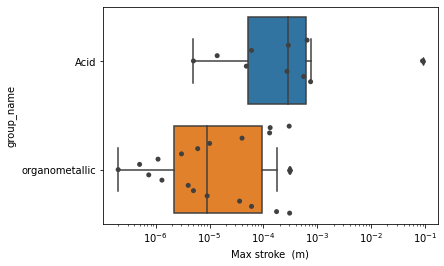

,test_name,categorical_col,continous_col,scale,group1_name,group2_name,group1_length,group2_length,pvalue,pvalue_sig,statistic,statistic_sig,sample_sig,overall_sig,group1,group2
68,t-test,CHEMICAL FAMILY,Max stroke (m),log,Acid,organometallic,10,30,0.003775,True,3.16972,True,True,Yes,CHEMICAL NA...,CHEMI...


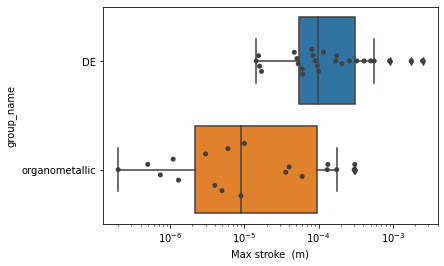

,test_name,categorical_col,continous_col,scale,group1_name,group2_name,group1_length,group2_length,pvalue,pvalue_sig,statistic,statistic_sig,sample_sig,overall_sig,group1,group2
179,t-test,CHEMICAL FAMILY,Max stroke (m),log,DE,organometallic,28,30,0.000069,True,4.407068,True,True,Yes,CHEMI...,CHEMI...


CHEMICAL FAMILY -vs- Stroke/Axis


/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  range_vals = max_val / min_val
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:18: RuntimeWarning: All-NaN slice encountered
  min_val = np.nanmin(vals)
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:19: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(vals)
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:20: RuntimeWarning: invalid value encountered in double_scalars
  range_vals = max_val / min_val
/Users/rodrigo.ceballos/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rodrigo.ceballos/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = r

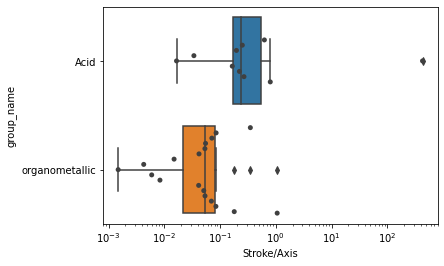

,test_name,categorical_col,continous_col,scale,group1_name,group2_name,group1_length,group2_length,pvalue,pvalue_sig,statistic,statistic_sig,sample_sig,overall_sig,group1,group2
68,t-test,CHEMICAL FAMILY,Stroke/Axis,log,Acid,organometallic,10,30,0.011809,True,2.707942,True,True,Yes,CHEMICAL NA...,CHEMI...


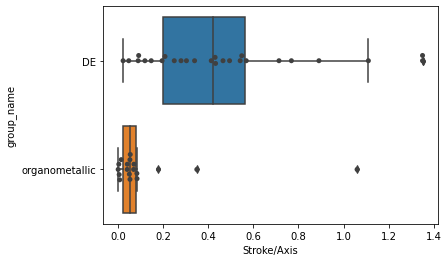

,test_name,categorical_col,continous_col,scale,group1_name,group2_name,group1_length,group2_length,pvalue,pvalue_sig,statistic,statistic_sig,sample_sig,overall_sig,group1,group2
179,t-test,CHEMICAL FAMILY,Stroke/Axis,linear,DE,organometallic,28,30,0.001378,True,3.42694,True,True,Yes,CHEMI...,CHEMI...


CHEMICAL FAMILY -vs- Max output force (N)


/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  range_vals = max_val / min_val
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:18: RuntimeWarning: All-NaN slice encountered
  min_val = np.nanmin(vals)
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:19: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(vals)
/Users/rodrigo.ceballos/repos/organic_crystals/statistical_analysis.py:20: RuntimeWarning: invalid value encountered in double_scalars
  range_vals = max_val / min_val
/Users/rodrigo.ceballos/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rodrigo.ceballos/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = r

KeyboardInterrupt: 

In [17]:
# test = sa.KStest()
test = sa.Ttest()

all_sig, all_results = pt.run_comparisons(df, selected_col_types, test,
                    comparison_type = 'pairs',
#                     comparison_type = 'one_vs_all', 
                    plot_whole_caterogy = 0, display_whole_caterogy = 0,
                    plot_significant_comparisons = 1, display_significant_comparisons = 1)

In [1]:
all_sig

NameError: name 'all_sig' is not defined

# XG Boost

## Main

In [8]:
%%bash
pip freeze

appnope==0.1.0
argon2-cffi==20.1.0
async-generator==1.10
attrs==20.2.0
backcall==0.2.0
bleach==3.3.0
catboost==0.24.4
certifi==2020.6.20
cffi==1.14.5
chardet==3.0.4
chart-studio==1.1.0
color==0.1
colour==0.1.5
cycler==0.10.0
decorator==4.4.2
defusedxml==0.7.1
eli5==0.11.0
entrypoints==0.3
enum34==1.1.10
et-xmlfile==1.0.1
graphviz==0.16
idna==2.10
importlib-metadata==2.0.0
ipykernel==5.3.4
ipython==7.18.1
ipython-genutils==0.2.0
ipywidgets==7.6.3
jdcal==1.4.1
jedi==0.17.2
Jinja2==2.11.3
joblib==0.17.0
jsonschema==3.2.0
jupyter-client==6.1.7
jupyter-core==4.6.3
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.0.0
kiwisolver==1.2.0
MarkupSafe==1.1.1
matplotlib==3.3.2
mistune==0.8.4
nbclient==0.5.3
nbconvert==6.0.7
nbformat==5.0.7
nest-asyncio==1.5.1
notebook==6.3.0
numpy==1.20.1
openpyxl==3.0.7
packaging==20.9
pandas==1.1.3
pandocfilters==1.4.3
parso==0.7.1
patsy==0.5.1
pexpect==4.8.0
pickleshare==0.7.5
Pillow==7.2.0
plotly==4.11.0
prometheus-client==0.9.0
prompt-toolkit==3.0.7
psutil==5.

In [33]:
params = {
    # Parameters that we are going to tune.
    'max_depth':5,
    'min_child_weight': 0,
    'eta':0.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [ ]:
for label_name in ['Max output force (N)', 'Max stroke  (m)', 'Response time  (s)']:
    print(f'\n\n===== Predicting {label_name} =====\n')
    ml.xg_boost_simple_train_and_eval(df, selected_col_types, params, label_name)



===== Predicting Max output force (N) =====

One hot encoding of categorical columns:
	CHEMICAL FAMILY -> ['AC' 'AZ' 'Acid' 'Amphiphilic crystals' 'Aryl vinyl benzoxazoles'
 'Arylidene-furanone' 'Arylidene-imidazolones\xa0' 'Co-crystal' 'DE'
 'Halogenated benzene' 'Hydrazide' 'Methyl Benzene' 'Naphthalene diimide '
 'Organic Salt' 'Peptide' 'Perovskites' 'Perylene' 'Pincer-Type Diester'
 'Salicylidene' 'Salicylideneanilines' 'Sesquiterpene lactone'
 'fluorenone' 'furylfulgide' 'olefin pairs' 'organometallic']
	Reaction Group1 -> ['2 + 2 Photodimerization' '4 + 4 Photodimerization'
 'Azide–alkyne cycloaddition' 'Conformational Change' 'E/Z isomerisation'
 'Intramolecular Proton Transfer' 'Keto-enol tautomrization'
 'Molecular Gliding' 'Molecular Gliding/Conformational'
 'Molecular Gliding/Rotation' 'Molecular Rotation' 'ferrocene trans-cis'
 'ring opening' 'trans-cis']
	Reaction Group2 -> ['Conformational Change' 'Intramolecular Proton Transfer'
 'Keto-enol tautomrization' 'Molecular 

## Simple train test

In [ ]:
# split dataset

# set params
params = {
    # Parameters that we are going to tune.
    'max_depth':3,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

X_train, X_test, y_train, y_test, dtrain, dtest = ml.get_datasets(X, y, test_size=0.3, random_state=0)
model, evals_result = ml.train_xgboost(dtrain, dtest, params, early_stopping_rounds=50)

In [344]:
metrics_df = ml.get_metrics_df(evals_result)
metrics_df

,train-rmse,validation-rmse
0,2.893631,2.958016
1,2.639795,2.785480
2,2.398947,2.680852
3,2.245970,2.605001
4,2.124340,2.572082
5,2.053760,2.552298
6,1.962335,2.487854
7,1.896331,2.475743
8,1.780762,2.447207
9,1.749879,2.481569


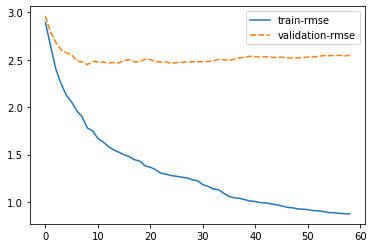

In [347]:
sns.lineplot(data=metrics_df)

In [ ]:
sns.lineplot(data=may_flights, x="year", y="passengers")

/home/rodrigo/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


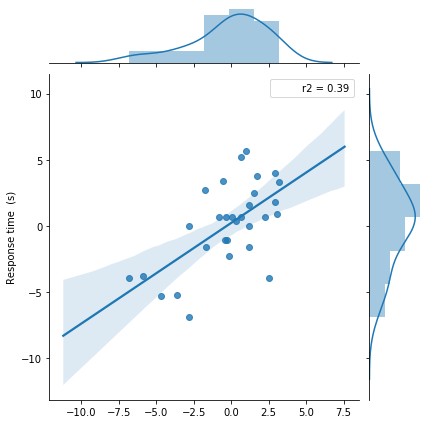

In [299]:
preds = model.predict(dtest)
sns.jointplot(preds, y_test, kind="reg", stat_func=r2)

In [300]:
explain_weights(model)

Weight,Feature
0.2694,Recovery time (s)
0.2489,Max work density (J m^-3)
0.1451,Max work output (J)
0.0871,Max output force (N)
0.0771,Max stroke (m)
0.0745,Max power output (kW)
0.0594,Actuator density (kg/m^3)
0.0313,E (Gpa)
0.0072,Max power density (kW m-3)
0,Uniaxial expansion/contraction


## Cross validation

In [249]:
dtrain = xgb.DMatrix(X, label=y)
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=50,
)
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,2.252964,0.072441,2.539436,0.424506
1,1.987126,0.062011,2.501727,0.353921
2,1.799241,0.057500,2.392457,0.326145
3,1.647636,0.053069,2.350828,0.287145
4,1.538981,0.050035,2.314628,0.242540


## Parameter tunning

In [272]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight, eta, subsample, colsample)
    for max_depth in range(1,5)
    for min_child_weight in range(0,5)
    for eta in [.3, .2, .1, .05, .01, .005]
#     for subsample in [i/10. for i in range(7,11)]
#     for colsample in [i/10. for i in range(7,11)]
    for subsample in [1]
    for colsample in [1]
]

In [273]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight, eta, subsample, colsample in gridsearch_params:

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['eta'] = eta
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=20
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = params
print(f"Best params (min_mae={min_mae}): {best_params}")

/home/rodrigo/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 2.6298128 for 0 rounds
	MAE 2.617614 for 0 rounds
	MAE 2.6141286 for 0 rounds
	MAE 2.612478 for 0 rounds
	MAE 2.6130568 for 4 rounds
	MAE 2.6130193999999998 for 7 rounds
	MAE 2.629813 for 0 rounds
	MAE 2.617614 for 0 rounds
	MAE 2.6141284000000002 for 0 rounds
	MAE 2.612478 for 0 rounds
	MAE 2.613057 for 4 rounds
	MAE 2.6130193999999998 for 7 rounds
	MAE 2.6298126 for 0 rounds
	MAE 2.617614 for 0 rounds
	MAE 2.6141284000000002 for 0 rounds
	MAE 2.612478 for 0 rounds
	MAE 2.613057 for 4 rounds
	MAE 2.6130192 for 7 rounds
	MAE 2.629813 for 0 rounds
	MAE 2.617614 for 0 rounds
	MAE 2.6141286 for 0 rounds
	MAE 2.612478 for 0 rounds
	MAE 2.6130568 for 4 rounds
	MAE 2.6130196000000003 for 7 rounds
	MAE 2.6298126 for 0 rounds
	MAE 2.6176138 for 0 rounds
	MAE 2.6141286 for 0 rounds
	MAE 2.612478 for 0 rounds
	MAE 2.6130568 for 4 rounds
	MAE 2.6130193999999998 for 7 rounds
	MAE 2.6019136 for 1 rounds
	MAE 2.5941522 for 1 rounds
	MAE 2.6086068000000004 for 9 rounds
	MAE 2.6124916 for 0 round

In [274]:
X_train, X_test, y_train, y_test, dtrain, dtest = ml.get_datasets(X, y, test_size=0.3, random_state=0)
model = ml.train_xgboost(dtrain, dtest, best_params, early_stopping_rounds=50)

[0]	Test-rmse:3.16657
[1]	Test-rmse:3.16158
[2]	Test-rmse:3.15664
[3]	Test-rmse:3.15175
[4]	Test-rmse:3.14691
[5]	Test-rmse:3.14211
[6]	Test-rmse:3.13737
[7]	Test-rmse:3.13267
[8]	Test-rmse:3.12803
[9]	Test-rmse:3.12343
[10]	Test-rmse:3.11887
[11]	Test-rmse:3.11437
[12]	Test-rmse:3.10991
[13]	Test-rmse:3.10550
[14]	Test-rmse:3.10113
[15]	Test-rmse:3.09681
[16]	Test-rmse:3.09254
[17]	Test-rmse:3.08831
[18]	Test-rmse:3.08412
[19]	Test-rmse:3.07998
[20]	Test-rmse:3.07527
[21]	Test-rmse:3.07045
[22]	Test-rmse:3.06581
[23]	Test-rmse:3.06182
[24]	Test-rmse:3.05725
[25]	Test-rmse:3.05259
[26]	Test-rmse:3.04809
[27]	Test-rmse:3.04424
[28]	Test-rmse:3.03981
[29]	Test-rmse:3.03530
[30]	Test-rmse:3.03095
[31]	Test-rmse:3.02664
[32]	Test-rmse:3.02295
[33]	Test-rmse:3.01871
[34]	Test-rmse:3.01508
[35]	Test-rmse:3.01091
[36]	Test-rmse:3.00664
[37]	Test-rmse:3.00254
[38]	Test-rmse:2.99904
[39]	Test-rmse:2.99501
[40]	Test-rmse:2.99088
[41]	Test-rmse:2.98692
[42]	Test-rmse:2.98354
[43]	Test-rmse:2.9796

[346]	Test-rmse:2.61592
[347]	Test-rmse:2.61592
[348]	Test-rmse:2.61550
[349]	Test-rmse:2.61550
[350]	Test-rmse:2.61488
[351]	Test-rmse:2.61444
[352]	Test-rmse:2.61445
[353]	Test-rmse:2.61402
[354]	Test-rmse:2.61403
[355]	Test-rmse:2.61361
[356]	Test-rmse:2.61320
[357]	Test-rmse:2.61288
[358]	Test-rmse:2.61198
[359]	Test-rmse:2.61199
[360]	Test-rmse:2.61196
[361]	Test-rmse:2.61107
[362]	Test-rmse:2.61103
[363]	Test-rmse:2.61106
[364]	Test-rmse:2.61018
[365]	Test-rmse:2.61016
[366]	Test-rmse:2.61013
[367]	Test-rmse:2.61017
[368]	Test-rmse:2.60932
[369]	Test-rmse:2.60930
[370]	Test-rmse:2.60791
[371]	Test-rmse:2.60790
[372]	Test-rmse:2.60796
[373]	Test-rmse:2.60712
[374]	Test-rmse:2.60712
[375]	Test-rmse:2.60712
[376]	Test-rmse:2.60629
[377]	Test-rmse:2.60629
[378]	Test-rmse:2.60495
[379]	Test-rmse:2.60502
[380]	Test-rmse:2.60504
[381]	Test-rmse:2.60423
[382]	Test-rmse:2.60424
[383]	Test-rmse:2.60433
[384]	Test-rmse:2.60302
[385]	Test-rmse:2.60304
[386]	Test-rmse:2.60314
[387]	Test-rmse:

[688]	Test-rmse:2.48543
[689]	Test-rmse:2.48527
[690]	Test-rmse:2.48498
[691]	Test-rmse:2.48502
[692]	Test-rmse:2.48545
[693]	Test-rmse:2.48550
[694]	Test-rmse:2.48536
[695]	Test-rmse:2.48449
[696]	Test-rmse:2.48420
[697]	Test-rmse:2.48489
[698]	Test-rmse:2.48441
[699]	Test-rmse:2.48447
[700]	Test-rmse:2.48439
[701]	Test-rmse:2.48488
[702]	Test-rmse:2.48436
[703]	Test-rmse:2.48390
[704]	Test-rmse:2.48291
[705]	Test-rmse:2.48264
[706]	Test-rmse:2.48165
[707]	Test-rmse:2.48208
[708]	Test-rmse:2.48213
[709]	Test-rmse:2.48281
[710]	Test-rmse:2.48274
[711]	Test-rmse:2.48229
[712]	Test-rmse:2.48178
[713]	Test-rmse:2.48171
[714]	Test-rmse:2.48074
[715]	Test-rmse:2.48030
[716]	Test-rmse:2.48098
[717]	Test-rmse:2.48072
[718]	Test-rmse:2.48023
[719]	Test-rmse:2.47979
[720]	Test-rmse:2.47980
[721]	Test-rmse:2.47885
[722]	Test-rmse:2.47860
[723]	Test-rmse:2.47811
[724]	Test-rmse:2.47813
[725]	Test-rmse:2.47764
[726]	Test-rmse:2.47716
[727]	Test-rmse:2.47719
[728]	Test-rmse:2.47721
[729]	Test-rmse:

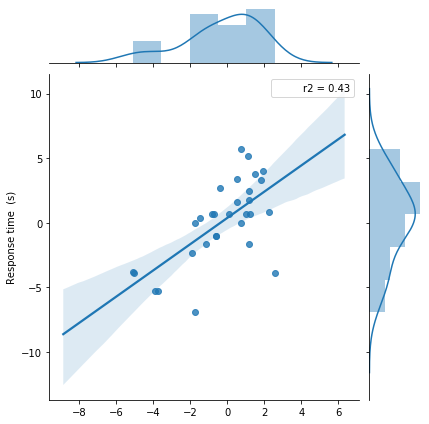

In [275]:
preds = model.predict(dtest)

sns.jointplot(preds, y_test, kind="reg", stat_func=r2)

In [297]:
explain_weights(model)

Weight,Feature
0.2638,Max work density (J m^-3)
0.2297,Recovery time (s)
0.1203,Max power output (kW)
0.0916,Actuator density (kg/m^3)
0.0848,Max stroke (m)
0.0638,Max work output (J)
0.0529,E (Gpa)
0.0527,Max output force (N)
0.0404,Max power density (kW m-3)
0,Uniaxial expansion/contraction


# Catboost

In [7]:
params = {
    'learning_rate':0.03,
#     'eval_metric': ('R2', 'RMSE'),
    'early_stopping_rounds':20,
}

In [8]:
all_predict_labels = ['Max stroke  (m)', 'Stroke/Axis', 'Response time  (s)','Max velocity  (m/s)','Max output force (N)', 'Max force density (N m^-3)',
                  ' Max work output  (J)', ' Max work density   (J m^-3)', ' Max power output  (kW)', 'Max power density  (kW m-3)',
                    'Actuator efficiency ']
dynamic_predict_labels = all_predict_labels[4:]
dynamic_predict_labels

['Max output force (N)',
 'Max force density (N m^-3)',
 ' Max work output  (J)',
 ' Max work density   (J m^-3)',
 ' Max power output  (kW)',
 'Max power density  (kW m-3)',
 'Actuator efficiency ']

In [9]:
all_predict_labels = ['Max stroke  (m)', 'Stroke/Axis', 'Response time  (s)','Max velocity  (m/s)','Max output force (N)', 'Max force density (N m^-3)',
                  ' Max work output  (J)', ' Max work density   (J m^-3)', ' Max power output  (kW)', 'Max power density  (kW m-3)',
                    'Actuator efficiency ']
dynamic_predict_labels = all_predict_labels[4:]

descriptors = {}
descriptors['new_descriptors'] = [label for label in list(df.columns) if label not in all_predict_labels]

for label_name in  all_predict_labels:
    print(f'\n\n===== Predicting {label_name} =====\n')
    ml.catboost_simple_train_and_eval(df, selected_col_types, params, label_name, descriptors['new_descriptors'])
    



===== Predicting Max stroke  (m) =====



NameError: name 'selected_col_types' is not defined



===== Predicting Max stroke  (m) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.933]


/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


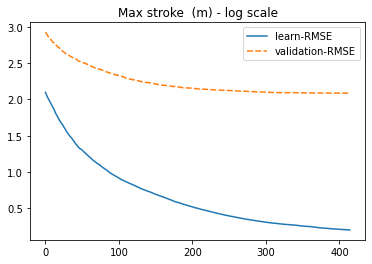

0.5766349504776023


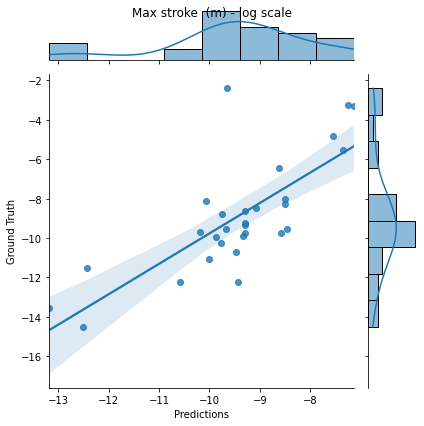

Weight,Feature
0.2247,Length (m)
0.2145,Type of deformation
0.0718,Molecular volume
0.0459,H
0.0300,Source of Actuation
0.0294,Fe
0.0291,P
0.0241,Habit
0.0224,CHEMICAL FAMILY
0.0220,Volume (m3)




===== Predicting Stroke/Axis =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.933]


/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


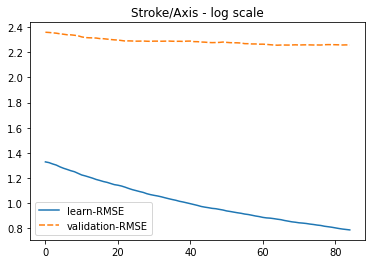

0.09765330089979586


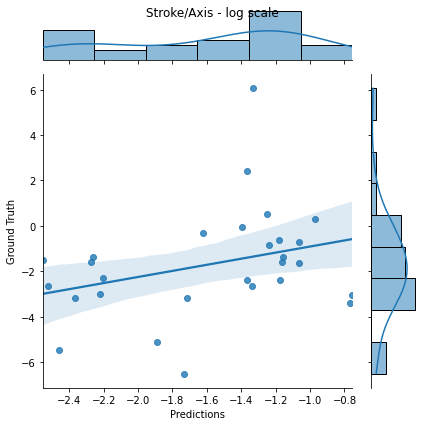

Weight,Feature
0.1849,Source of Actuation
0.1635,Martensitic
0.0743,Type of deformation
0.0454,Reaction Group1
0.0370,Reaction Group2
0.0352,H
0.0323,Crystal Family
0.0307,Volume (m3)
0.0278,Calc. Density (R)
0.0278,c




===== Predicting Response time  (s) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.933]


/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


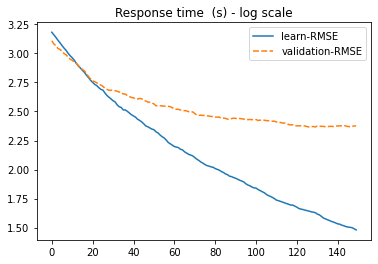

0.5109095844171907


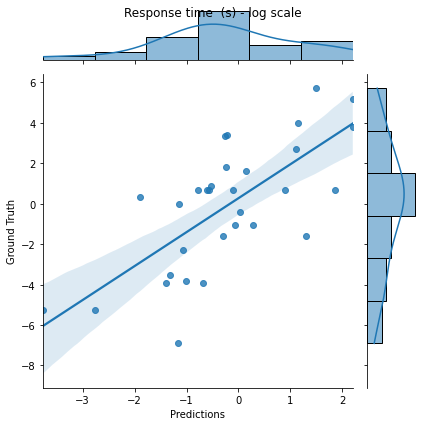

Weight,Feature
0.1266,Phase transition
0.1066,Type of deformation
0.0593,Cell Volume (R)
0.0419,Source of Actuation
0.0407,CHEMICAL FAMILY
0.0388,Recovery time (s)
0.0382,No. of Coordinates (I)
0.0368,Crystal Family
0.0360,Space Gp. Symbol (L)
0.0333,b




===== Predicting Max velocity  (m/s) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.933]


/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


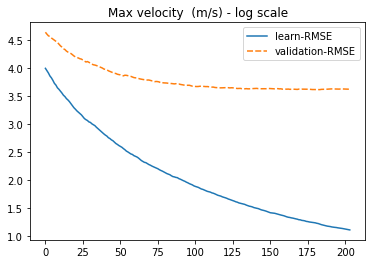

0.4238646112408032


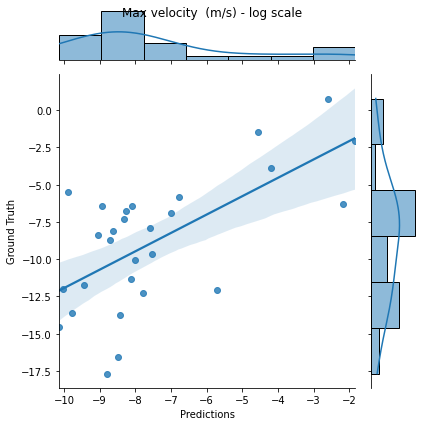

Weight,Feature
0.2660,Type of deformation
0.1034,Recovery time (s)
0.0942,Crystal intact
0.0353,Length (m)
0.0300,Source of Actuation
0.0267,Volume (m3)
0.0267,Z Prime (R)
0.0251,Space Gp. Symbol (L)
0.0241,Reaction Group2
0.0226,Reaction Group1




===== Predicting Max output force (N) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.933]


/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


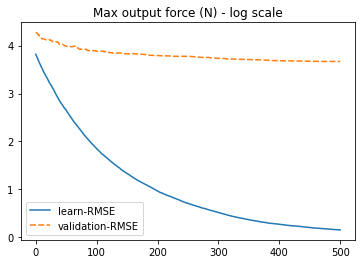

0.48506862719583266


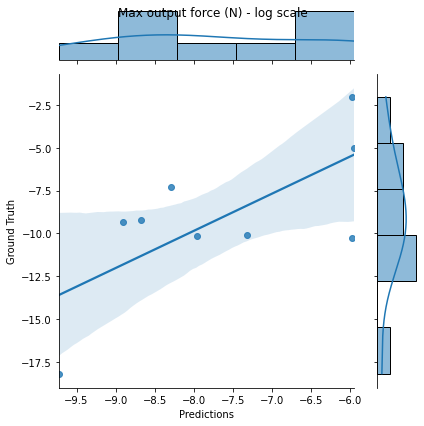

Weight,Feature
0.1353,Space Gp. Symbol (L)
0.1025,Space Gp. Number (I)
0.0793,N
0.0725,Volume (m3)
0.0446,Length (m)
0.0404,H
0.0385,c
0.0379,Width (m)
0.0293,Thickness (m)
0.0289,Type of deformation




===== Predicting Max force density (N m^-3) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.

/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


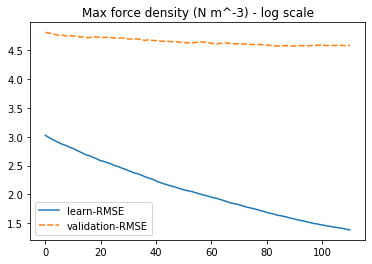

0.1462994958817599


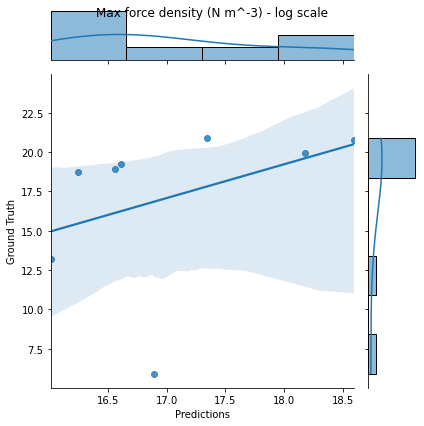

Weight,Feature
0.0924,Length (m)
0.0627,Reaction Group2
0.0550,C
0.0451,b
0.0437,Cell Volume (R)
0.0415,Martensitic
0.0392,No. of Coordinates (I)
0.0345,Space Gp. Number (I)
0.0344,Thickness (m)
0.0340,Z Prime (R)




===== Predicting  Max work output  (J) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.933]


/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


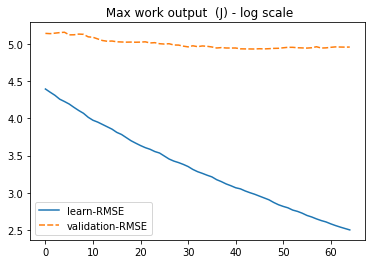

0.1611266885391687


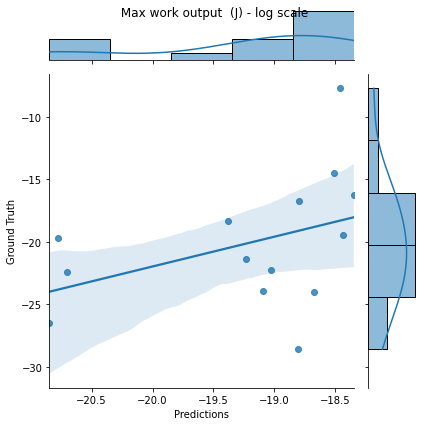

Weight,Feature
0.0941,Source of Actuation
0.0811,Molecular volume
0.0714,F
0.0623,Width (m)
0.0586,Weight (kg)
0.0584,Volume (m3)
0.0539,Length (m)
0.0525,Cell Volume (R)
0.0365,CHEMICAL FAMILY
0.0326,E (Gpa)




===== Predicting  Max work density   (J m^-3) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -

/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


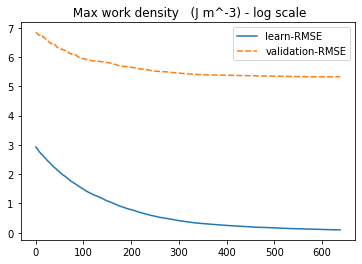

0.3814366738985786


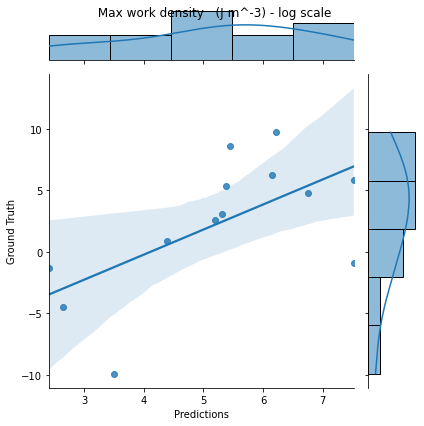

Weight,Feature
0.1563,Habit
0.1015,Martensitic
0.0551,Space Gp. Symbol (L)
0.0536,Beta
0.0527,Length (m)
0.0480,Source of Actuation
0.0451,Width (m)
0.0418,c
0.0364,Reaction Group1
0.0359,Type of deformation




===== Predicting  Max power output  (kW) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.933

/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


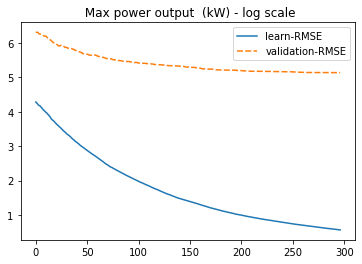

0.38881209259984917


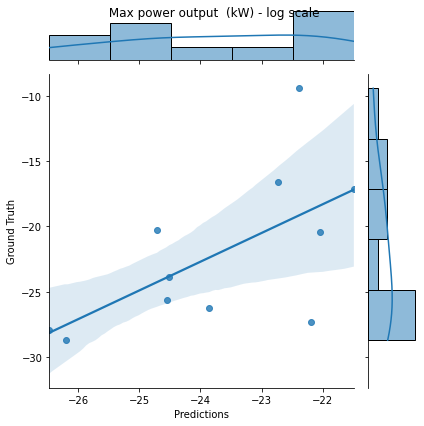

Weight,Feature
0.1472,Volume (m3)
0.1005,Source of Actuation
0.0553,c
0.0511,Phase transition
0.0428,Habit
0.0382,Molecular volume
0.0373,Space Gp. Symbol (L)
0.0348,Study Temp. (I)
0.0338,a
0.0323,C




===== Predicting Max power density  (kW m-3) =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5

/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


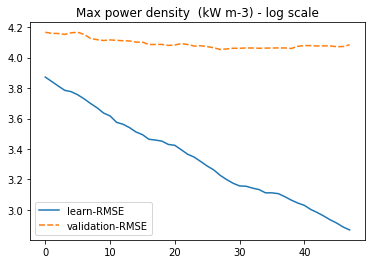

0.27659811533517026


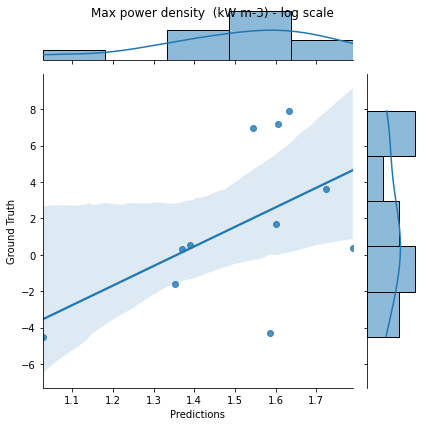

Weight,Feature
0.1283,Length (m)
0.1035,Volume (m3)
0.0758,Crystal intact
0.0507,Martensitic
0.0470,Width (m)
0.0399,Thickness (m)
0.0366,Weight (kg)
0.0351,Space Gp. Symbol (L)
0.0339,C
0.0324,Molecular volume




===== Predicting Actuator efficiency  =====

Re-scaling log columns:
	Length  (m): [0.   0.06] -> [-12.024  -2.813]
	Width  (m): [0.    0.004] -> [-15.547  -5.586]
	Thickness  (m): [0.    0.002] -> [-15.547  -6.215]
	Volume (m3): [0. 0.] -> [-42.895 -17.322]
	Weight  (kg): [0. 0.] -> [-25.082 -12.996]
	Max stroke  (m): [0.   0.09] -> [-15.425  -2.408]
	Stroke/Axis: [1.00e-03 4.29e+02] -> [-6.509  6.061]
	Max velocity  (m/s): [0.  4.7] -> [-17.679   1.548]
	Max output force (N): [0.    0.132] -> [-22.15   -2.025]
	Max force density (N m^-3): [3.70e+02 8.29e+10] -> [ 5.914 25.141]
	 Max work output  (J): [0. 0.] -> [-28.612  -7.706]
	 Max work density   (J m^-3): [    0. 81300.] -> [-9.903 11.306]
	 Max power output  (kW): [0. 0.] -> [-35.638  -9.421]
	Max power density  (kW m-3): [1.00e-03 1.53e+04] -> [-7.573  9.636]
	Response time  (s): [  0. 300.] -> [-8.517  5.704]
	Recovery time  (s): [2.0e-03 4.8e+02] -> [-6.215  6.174]
	Actuator efficiency : [0.    0.003] -> [-44.309  -5.933]


/Users/jfm418/Documents/Papers/Dynamic review/Rodrigo/organic_crystals/ml.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col_name] = X[col_name].astype('str')


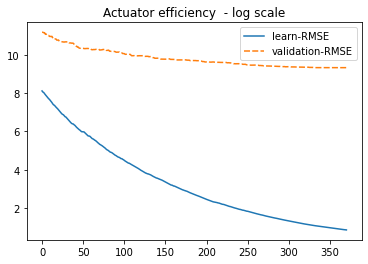

0.8887758980843591


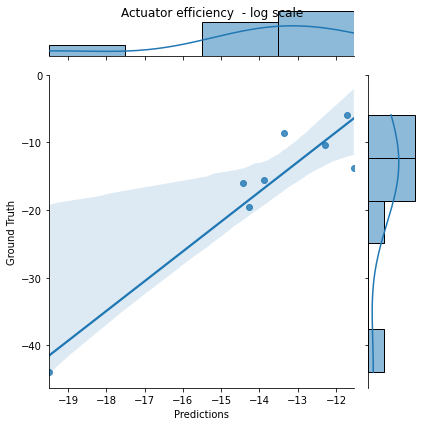

Weight,Feature
0.1285,c
0.1170,Cell Volume (R)
0.1054,Volume (m3)
0.0560,Habit
0.0437,Reversibility of actuation
0.0319,Length (m)
0.0283,Space Gp. Symbol (L)
0.0282,Space Gp. Number (I)
0.0266,Crystal Family
0.0253,O


In [117]:
for label_name in  all_predict_labels:
    print(f'\n\n===== Predicting {label_name} =====\n')
    ml.catboost_simple_train_and_eval(df, selected_col_types, params, label_name, descriptors['original_descriptors'])
    

# Regression

Pearson R2: 0.5301947514065304 - Used: 37 / 122


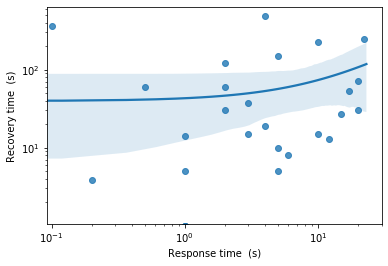

In [25]:
y_axis = 'Recovery time  (s)'
x_axis = 'Response time  (s)'
control = 'Thickness  (m)'

pt.plot(df, col_types, x_axis, y_axis)


# Controlling for other variables

In [203]:
col_types = sa.get_col_types(df)

df_stat = copy.copy(df)

stat_names = {}
for col_name in df.columns:
    stat_names[col_name] = re.sub(r"\([^()]*\)", "", col_name.lower()).strip().replace(' ', '_')
    if col_types.loc[col_name]['scale'] == 'log':
        df_stat[col_name] = np.log(df_stat[col_name])
    
df_stat = df_stat.rename(columns=stat_names)

In [204]:
x_axis = 'phase_transition'
y_axis = 'response_time'
control = 'thickness' 

eq_str = f'{y_axis} ~ C({x_axis}) + {control}'
print(f'EQ: {eq_str}\n')
results = smf.ols(eq_str, data=df_stat).fit()
print(results.summary())

EQ: response_time ~ C(phase_transition) + thickness

                            OLS Regression Results                            
Dep. Variable:          response_time   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     8.404
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           0.000567
Time:                        15:20:54   Log-Likelihood:                -157.76
No. Observations:                  68   AIC:                             321.5
Df Residuals:                      65   BIC:                             328.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

# Scratch

In [14]:
df.describe()

,Length (m),Width (m),Thickness (m),Volume (m3),Weight (kg),Actuator density (kg/m^3),E (Gpa),H (Gpa),Max stroke (m),Stroke/Actuation Axis,Max velocity (m/s),Max output force (N),Max force density (N m^-3),Max work output (J),Max work density (J m^-3),Max power output (kW),Max power density (kW m-3),Response time (s),Recovery time (s)
count,105.000000,8.200000e+01,8.800000e+01,8.400000e+01,3.400000e+01,74.000000,17.000000,5.000000,9.300000e+01,92.000000,4.400000e+01,2.800000e+01,2.500000e+01,4.400000e+01,42.000000,3.300000e+01,33.000000,100.000000,37.000000
mean,0.002118,2.638547e-04,1.082114e-04,7.026469e-10,1.917745e-07,1453.202703,5.870588,0.449000,2.236071e-03,5.247966,3.064184e-01,1.045318e-02,3.543614e+09,1.060783e-05,7119.725614,2.457925e-06,915.784244,15.013837,55.796081
std,0.006526,5.141190e-04,2.643937e-04,3.722795e-09,4.716090e-07,215.094371,4.160895,0.278622,1.077026e-02,44.657634,8.091103e-01,2.942989e-02,1.652752e+10,6.779850e-05,16473.150265,1.409969e-05,2987.655421,47.244425,107.334384
min,0.000006,1.770000e-07,1.770000e-07,2.349675e-19,1.275750e-11,1020.000000,0.760000,0.175000,2.000000e-07,0.001493,8.333333e-07,2.400000e-10,3.703704e+02,3.750705e-13,0.000050,1.875672e-14,0.011066,0.000200,0.002000
25%,0.000203,3.400000e-05,6.000000e-06,2.367029e-13,2.824983e-09,1322.250000,2.600000,0.330000,1.700000e-05,0.071071,3.106250e-04,7.745183e-05,2.666667e+06,1.508750e-10,21.727476,2.200000e-12,0.511531,0.034500,1.000000
50%,0.000500,1.100000e-04,1.895000e-05,2.666963e-12,1.290000e-08,1424.500000,3.800000,0.330000,8.400000e-05,0.197517,4.100000e-03,2.996955e-04,5.207101e+07,3.670500e-09,651.444240,2.960000e-11,2.774194,1.750000,13.000000
75%,0.001540,2.505000e-04,5.362500e-05,3.129531e-11,9.000000e-08,1536.250000,8.500000,0.510000,3.200000e-04,0.506793,1.525000e-01,1.400000e-03,3.426634e+08,6.614200e-08,2692.713688,7.115385e-10,67.947516,6.250000,53.000000
max,0.060000,3.750000e-03,2.000000e-03,3.000000e-08,2.271000e-06,2189.000000,15.000000,0.900000,9.000000e-02,428.571429,4.700000e+00,1.320000e-01,8.285176e+10,4.500000e-04,81300.000000,8.100000e-05,15327.575136,300.000000,480.000000
